In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control

### 1st order Example

Transfer function:

$$ G(s) = \frac{k}{1+T_1 s} $$

In [25]:
# parameters
k = 0.9
T1 = 5
# numerator and denominator polynomial coefficients
num = [k]
den = [T1, 1]
# definition of transfer function
G = control.tf(num, den)

In [26]:
G


  0.9
-------
5 s + 1

In [27]:
#poles
G.pole()

array([-0.2])

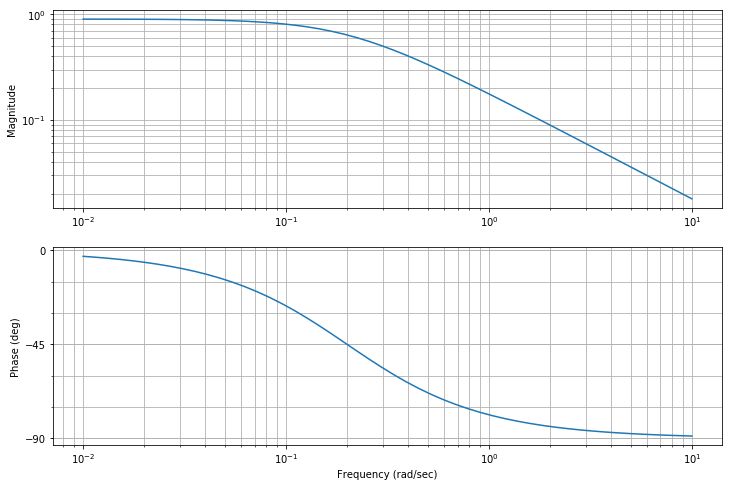

In [28]:
# Bode plot
plt.figure(figsize=(12,8))
Mag, phase, omega = control.bode(G)

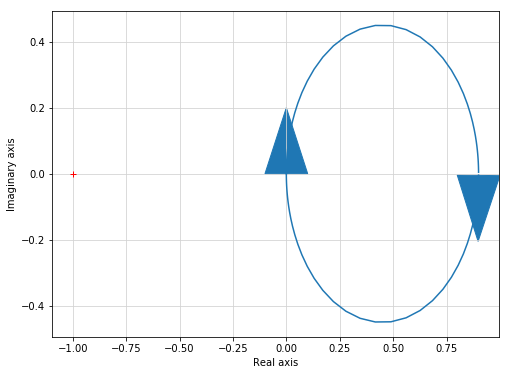

In [29]:
# Nyquist plot
plt.figure(figsize=(8,6))
omega = np.logspace(-3,4,100)
real, imag, freq = control.nyquist_plot(G,omega=omega)

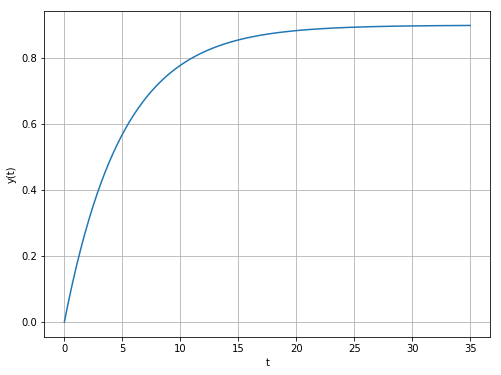

In [30]:
# step response
t, yout = control.step_response(G)
plt.figure(figsize=(8,6))
plt.plot(t,yout), plt.xlabel('t'), plt.ylabel('y(t)'), plt.grid(True);

### 2nd order Example

Transfer function:

$$ G(s) = \frac{k}{1+2 \xi T s + T^2 s^2} $$

In [31]:
# parameters
k = 0.9
T = 5
xi = 0.4
# numerator and denominator polynomial coefficients
num = [k]
den = [T**2, 2*xi*T, 1]
# definition of transfer function
G = control.tf(num, den)

In [32]:
G


      0.9
----------------
25 s^2 + 4 s + 1

In [33]:
# poles
G.pole()

array([-0.08+0.18330303j, -0.08-0.18330303j])

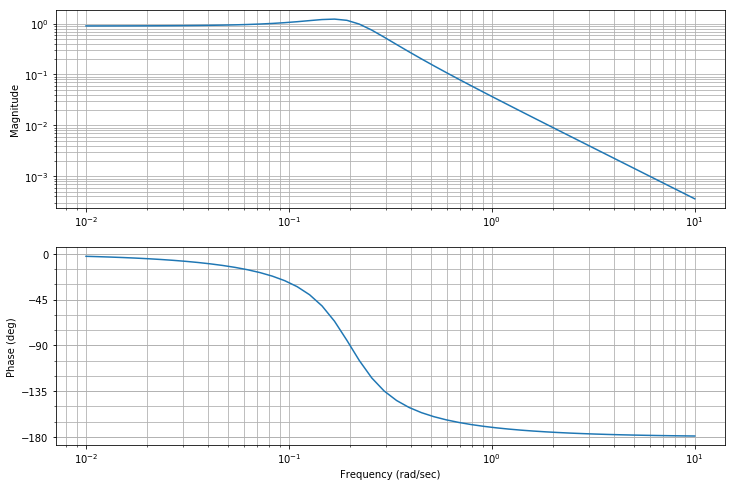

In [34]:
plt.figure(figsize=(12,8))
Mag, Phase, freq = control.bode(G)

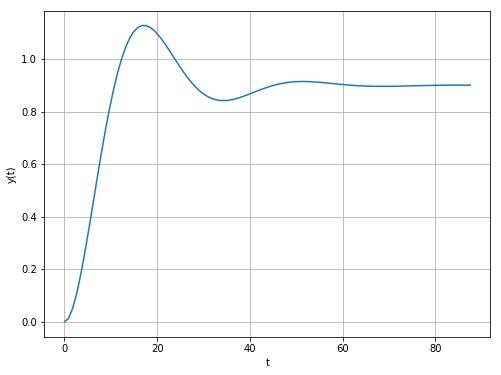

In [35]:
# step response
t, yout = control.step_response(G)
plt.figure(figsize=(8,6))
plt.plot(t,yout), plt.xlabel('t'), plt.ylabel('y(t)'), plt.grid(True);

## System Interconnections Example


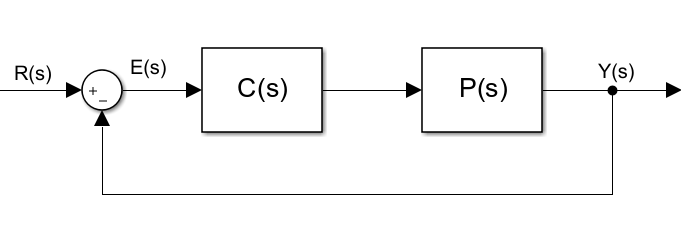


Controller:

$$ C(s) = K_p $$

Process:

$$ P(s) = \frac{k}{1+T_1 s}$$

In [36]:
# parameters
k = 0.9
T1 = 5
Kp = 10
# systems
numC = Kp
denC = 1
C = control.tf(numC, denC)

numP = k
denP = [T1, 1]
P = control.tf(numP, denP)

In [37]:
C


10
--
1

In [38]:
P


  0.9
-------
5 s + 1

In [39]:
# serial connection of two systems
G0 = control.series(C, P)

In [40]:
G0


   9
-------
5 s + 1

In [41]:
# feedback connection
G = control.feedback(G0)

In [42]:
G


    9
--------
5 s + 10

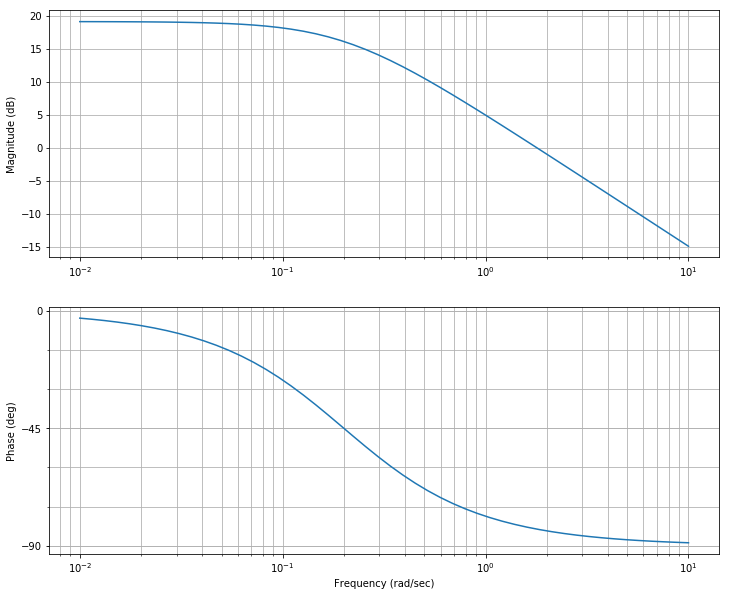

In [43]:
# Bode-plot of open loop
plt.figure(figsize=(12,10))
Mag, Phase, freq = control.bode(G0, dB=True)

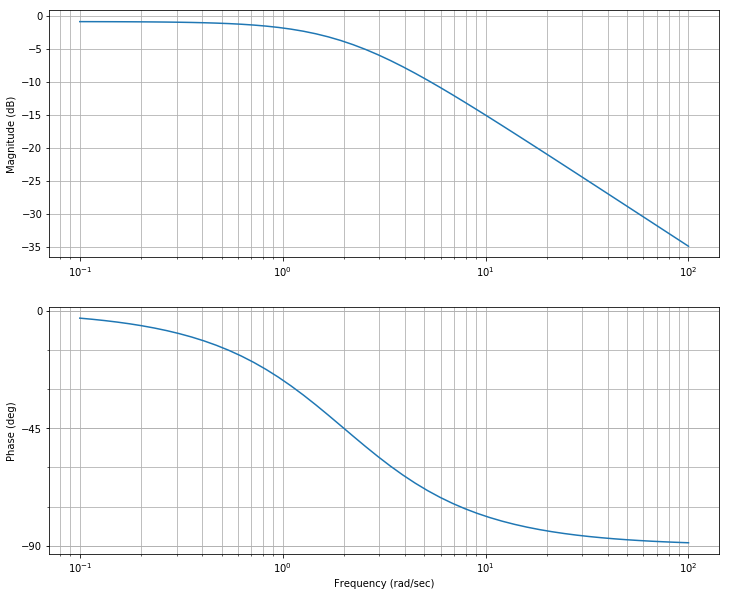

In [44]:
# Bode-plot of closed loop
plt.figure(figsize=(12,10))
Mag, Phase, freq = control.bode(G, dB=True)